In [32]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import explained_variance_score
from sklearn import cross_validation
from scipy.stats import spearmanr
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(context="paper", font="monospace")

%matplotlib inline


In [19]:
rawdata = pd.read_csv('cfd2Data.csv')
attract = rawdata['Attractive']

In [8]:
# geometric_feature_list = ['Luminance_median', 'Nose_width', 'Nose_Length']
# geometric_feature = pd.DataFrame(rawdata, columns=geometric_feature_list)

In [20]:
geo_start_ind = rawdata.columns.get_loc("Luminance_median")
geometric_feature = rawdata[rawdata.columns[geo_start_ind:]]

In [27]:
# to check if df contains any nan rows. 
print pd.isnull(geometric_feature).any(1).nonzero()[0]
print pd.isnull(attract).nonzero()[0]

[]
[]


In [33]:
# preprocessing the data. 
feature_x = geometric_feature.values
feature_x = preprocessing.scale(feature_x) 
x_fields = list(geometric_feature.columns.values)
attract_y = attract.values

In [29]:
feature_x.shape

(597, 40)

In [30]:
attract_y.shape

(597,)

In [68]:
# Run linear regression multiple times. 
itr_num = 50
random_seed = np.random.randint(1, 1000, size=itr_num)

test_corr_list = np.zeros((itr_num, 1))
coef_list = np.zeros((len(x_fields), itr_num))
intercept_list = np.zeros((itr_num, 1))
alpha_list = np.zeros((itr_num, 1))
alphas = np.logspace(-5, 1, num=20)
# alphas = [0.0000001, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,30]

for cur_itr in range(itr_num):
#     print cur_itr
    x_train, x_test, y_train, y_test = cross_validation.train_test_split(feature_x, attract_y, test_size=0.5, random_state=random_seed[cur_itr])
    clf = linear_model.RidgeCV(alphas=alphas, fit_intercept=True)
#     clf = linear_model.LassoCV()
#     clf = linear_model.LinearRegression()
    clf.fit(x_train, y_train)
    
    coef_list[:, cur_itr] = clf.coef_
    intercept_list[cur_itr] = clf.intercept_
    alpha_list[cur_itr] = clf.alpha_
    
    y_test_pred = clf.predict(x_test)
    corr = spearmanr(y_test, y_test_pred)
    test_corr_list[cur_itr] = corr[0]

test_corr_list.mean()

0.41636466364915448

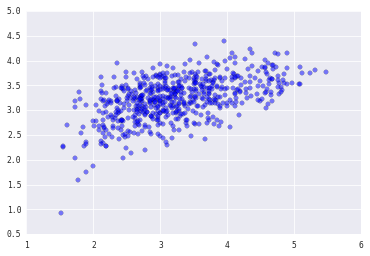

In [78]:
clf = linear_model.LinearRegression()
clf.fit(feature_x, attract_y)

y_pred = clf.predict(feature_x)


y_train_pred = clf.predict(x_train)
plt.scatter(attract_y, y_pred, alpha=0.5)
plt.show()

In [80]:
social_feature_list = ['Afraid', 'Angry', 'Babyface', 'Disgusted', 'Dominant', \
                      'Feminine', 'Happy', 'Masculine', 'Prototypic', 'Sad', \
                      'Surprised', 'Threatening', 'Trustworthy', 'Unusual']
social_feature = pd.DataFrame(rawdata, columns=social_feature_list)

In [81]:
# to check if df contains any nan rows. 
print pd.isnull(social_feature).any(1).nonzero()[0]
print pd.isnull(attract).nonzero()[0]

[]
[]


In [82]:
# preprocessing the data. 
feature_x = social_feature.values
feature_x = preprocessing.scale(feature_x) 
x_fields = list(social_feature.columns.values)
attract_y = attract.values


# Run linear regression multiple times. 
itr_num = 50
random_seed = np.random.randint(1, 1000, size=itr_num)

test_corr_list = np.zeros((itr_num, 1))
coef_list = np.zeros((len(x_fields), itr_num))
intercept_list = np.zeros((itr_num, 1))
alpha_list = np.zeros((itr_num, 1))
alphas = np.logspace(-5, 1, num=20)
# alphas = [0.0000001, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,30]

for cur_itr in range(itr_num):
#     print cur_itr
    x_train, x_test, y_train, y_test = cross_validation.train_test_split(feature_x, attract_y, test_size=0.5, random_state=random_seed[cur_itr])
    clf = linear_model.RidgeCV(alphas=alphas, fit_intercept=True)
#     clf = linear_model.LassoCV()
#     clf = linear_model.LinearRegression()
    clf.fit(x_train, y_train)
    
    coef_list[:, cur_itr] = clf.coef_
    intercept_list[cur_itr] = clf.intercept_
    alpha_list[cur_itr] = clf.alpha_
    
    y_test_pred = clf.predict(x_test)
    corr = spearmanr(y_test, y_test_pred)
    test_corr_list[cur_itr] = corr[0]

test_corr_list.mean()

0.74946810671692388

In [ ]:
# Now plot the social features with error bar. 
coef_mean = coef_list.mean(axis=1)
coef_std = coef_list.std(axis=1)/np.sqrt(len(coef_mean))

# plot
n = len(coef_mean)  # number of data entries
ind = np.arange(n)  # the x locations for the groups
width = 0.35 # bar width

fig, ax = plt.subplots()

rects1 = ax.bar(ind, coef_mean,                  # data
                width,                          # bar width
                color='MediumSlateBlue',        # bar colour
                yerr=coef_std,                  # data for error bars
                error_kw={'ecolor':'Tomato',    # error-bars colour
                          'linewidth':2})       # error-bar width

axes = plt.gca()
axes.set_ylim([-1.5, 1])


ax.set_ylabel('coefficient')
ax.set_title('coefficients of every geometric feature')

ax.set_xticks(ind + width)
ax.set_xticklabels(x_fields, rotation=90)
plt.tick_params(labelsize=10)
plt.savefig('../figs/geometric_feature_bargraph.png')
plt.show()